**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [3]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [4]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('churn_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [5]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop('customerID', axis = 1)
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [6]:
# 여기에 답안코드를 작성하세요.
print(df1['TotalCharges'].dtypes)
df1['TotalCharges'] = df1['TotalCharges'].replace({' ' : 0})
df1['TotalCharges'] = df1['TotalCharges'].astype(float)
print(df1['TotalCharges'].dtypes)

df2 = df1.copy()

object
float64


<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [7]:
# 여기에 답안코드를 작성하세요.

print(df2['Churn'].value_counts())
df2['Churn'] = df2['Churn'].replace({ 'Yes': 1, 'No': 0 })

print('-' * 30)
print(df2['Churn'].value_counts())
df3 = df2.copy()

Churn
No     5174
Yes    1869
Name: count, dtype: int64
------------------------------
Churn
0    5174
1    1869
Name: count, dtype: int64


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [8]:
# 여기에 답안코드를 작성하세요.
print(df3.isna().sum())

df4 = df3.copy()
df4.drop('DeviceProtection', axis = 1, inplace = True)
df4.dropna(inplace = True)

print('-' * 30)
print(df4.isna().sum())

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64
------------------------------
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

SeniorCitizen
0.0    5885
1.0    1142
Name: count, dtype: int64


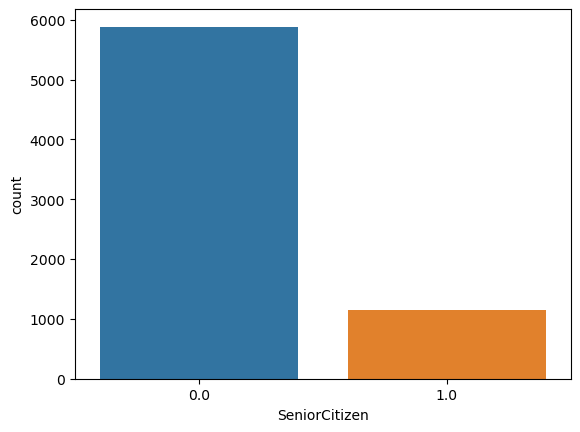

In [9]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns
import matplotlib.pyplot as plt

print(df4['SeniorCitizen'].value_counts())
sns.countplot(x = 'SeniorCitizen', data = df4)
plt.show()

df4 = df4.drop('SeniorCitizen',axis = 1)

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

O
O


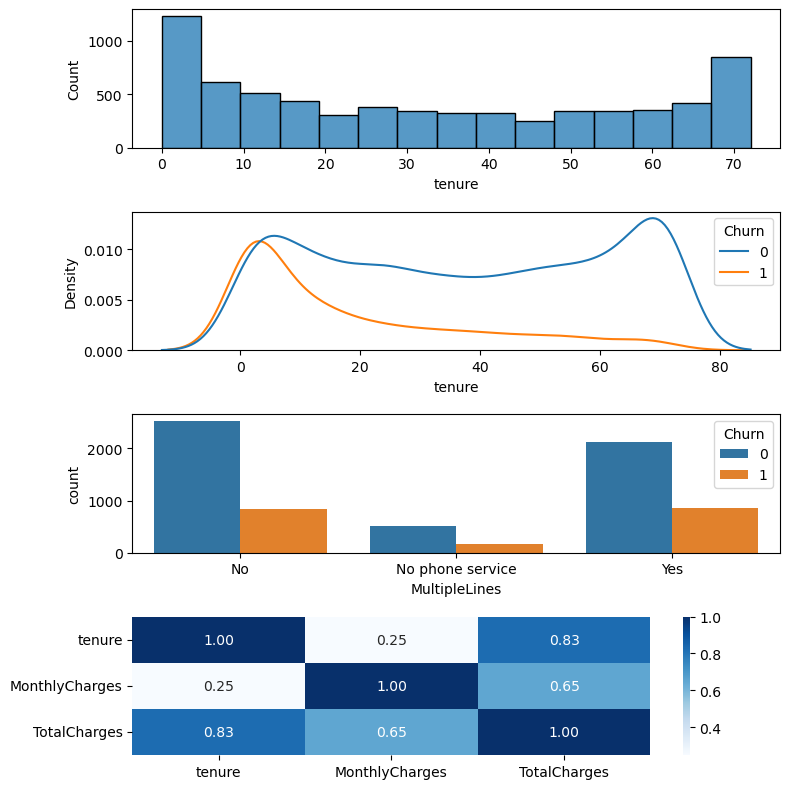

In [10]:
# 여기에 답안코드를 작성하세요.
plt.figure(figsize = (8, 8))
plt.subplot(4, 1, 1)
sns.histplot(x='tenure', data = df4)

plt.subplot(4, 1, 2)
sns.kdeplot(x='tenure', data = df4, hue='Churn')
print('O')

plt.subplot(4, 1, 3)
sns.countplot(x = 'MultipleLines', data = df4, hue='Churn')
print('O')

plt.subplot(4, 1, 4)
temp_df = df4[['tenure', 'MonthlyCharges', 'TotalCharges']]

sns.heatmap(temp_df.corr(),
           cmap = 'Blues',
           annot = True,
           fmt = '.2f')

plt.tight_layout()
plt.show()

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [11]:
# 여기에 답안코드를 작성하세요.
object_cols = df4.select_dtypes(object).columns
print(object_cols)

df5 = pd.get_dummies(df4, columns = object_cols, dtype = int)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')


<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [12]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

target = 'Churn'

X = df5.drop(target, axis = 1)
y = df5[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [13]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [14]:
# 여기에 답안코드를 작성하세요.(LogisticRegression)
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 선언
lr_model = LogisticRegression()

# 학습
lr_model.fit(X_train, y_train)

# 검증
lr_model.score(X_valid, y_valid)

0.7930298719772404

In [15]:
# 여기에 답안코드를 작성하세요.(KNN)
from sklearn.neighbors import KNeighborsClassifier


# KNN 모델 선언
knn_model = KNeighborsClassifier(n_neighbors=5)

# 학습
knn_model.fit(X_train, y_train)

# 검증
knn_model.score(X_valid, y_valid)

0.7567567567567568

In [16]:
# 여기에 답안코드를 작성하세요.(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 모델 선언
dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 42)

# 학습
dt_model.fit(X_train, y_train)

# 검증
dt_model.score(X_valid, y_valid)

0.7617354196301565

In [17]:
# 여기에 답안코드를 작성하세요.(RandomForest)
from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 선언
rf_model = RandomForestClassifier(n_estimators=3, random_state = 42)

# 학습
rf_model.fit(X_train, y_train)

# 검증
rf_model.score(X_valid, y_valid)

0.7467994310099573

In [18]:
# 여기에 답안코드를 작성하세요.(XgBoost)
from xgboost import XGBClassifier

# XGBoost 모델 선언
xgb_model = XGBClassifier(n_estimators=3, random_state = 42)

# 학습
xgb_model.fit(X_train, y_train)

# 검증
xgb_model.score(X_valid, y_valid)

0.7930298719772404

In [19]:
# 여기에 답안코드를 작성하세요.(lightgbm)
from lightgbm import LGBMClassifier

# LightGBM 모델 선언
light_model = LGBMClassifier(n_estimators=3, random_state = 42, verbose = 0)

# 학습
light_model.fit(X_train, y_train)

# 검증
light_model.score(X_valid, y_valid)

0.7347083926031295

### 14. 바로 위 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

[[1033    0]
 [ 373    0]]


<Axes: >

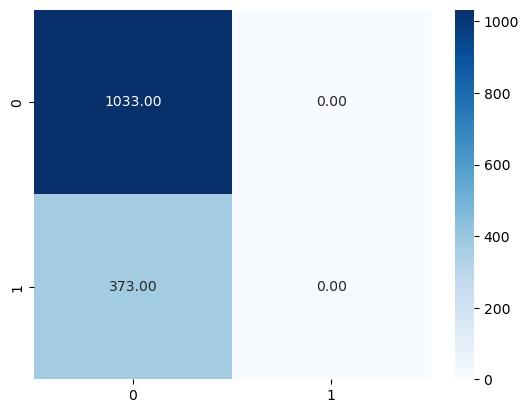

In [20]:
# 여기에 답안코드를 작성하세요
from sklearn.metrics import confusion_matrix

y_pred = light_model.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))

sns.heatmap(confusion_matrix(y_valid, y_pred),
           annot = True,
           fmt = '.2f',
           cmap = 'Blues')

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [23]:
# 여기에 답안코드를 작성하세요.

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', patience=5) 

checkpoint_path = 'best_model.keras'
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                   validation_data = (X_valid, y_valid),
                    callbacks=[es, mc]
                    )

Epoch 1/30
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7404 - loss: 0.5095
Epoch 1: val_loss improved from inf to 0.44442, saving model to best_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7411 - loss: 0.5085 - val_accuracy: 0.7845 - val_loss: 0.4444
Epoch 2/30
332/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4221
Epoch 2: val_loss improved from 0.44442 to 0.43625, saving model to best_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.4226 - val_accuracy: 0.7859 - val_loss: 0.4363
Epoch 3/30
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4182
Epoch 3: val_loss improved from 0.43625 to 0.43338, saving model to best_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7965 - loss: 0.4182 - val_accuracy: 0.7881 - val_loss: 0.4334
Epoch 4/30
339/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4132
Epoch 4: val_loss did not improve from 0.43338
352/352

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

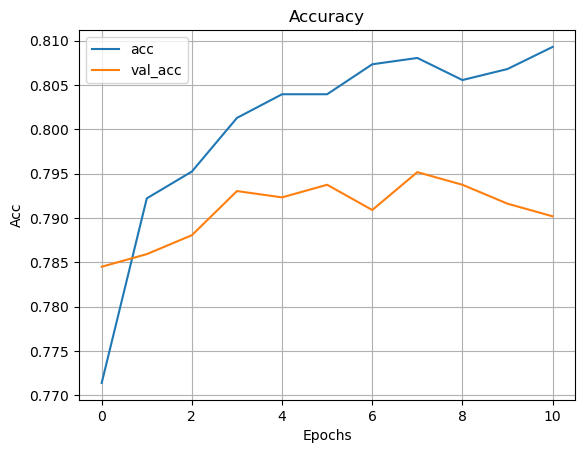

In [24]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid()
plt.show()